# Ensemble Model

Ensemble models is a machine learning approach to combine multiple other models in the prediction process. Ensemble modeling offers one of the most convincing way to build highly accurate predictive models. This file implements the stacking method. Stacking is designed to improve modeling performance.

The references/citations are listed towards the end of the file.

https://miro.medium.com/max/1400/1*22Ukd9hgt1rOV6k0RXwOBA.png


In [1]:
from google.colab import output

# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn
import matplotlib.pyplot as plt

# NumPy Libraries
from numpy import mean
from numpy import std

# SkLearn Libraries
import sklearn
from sklearn.datasets import fetch_openml
from sklearn import datasets, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier

output.clear()      # clear output

In [2]:
# Gather data
batch_size = 32

mnist = fetch_openml('mnist_784')

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = svm.SVC()
	return models

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate a given model using cross-validation
# returns a list of scores from three repeats of stratified 10-fold cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


In [4]:
X, y = mnist['data'] , mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
models = get_models()
models

{'cart': DecisionTreeClassifier(), 'lr': LogisticRegression(), 'svm': SVC()}

In [6]:
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
  # report the mean performance of each algorithm
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>lr 0.922 (0.003)
>cart 0.876 (0.003)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>svm 0.980 (0.001)


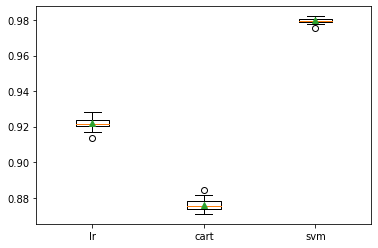

In [7]:
from matplotlib import pyplot

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## References

1. https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

3. https://www.datacamp.com/community/tutorials/ensemble-learning-python